In [3]:
!pip install tensorflow seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/332.0 MB 8.4 MB/s eta 0:00:40
    --------------------------------------- 4.2/332.0 MB 12.3 MB/s eta 0:00:27
    --------------------------------------- 7.6/332.0 MB 13.2 MB/s eta 0:00:25
   - -------------------------------------- 10.2/332.0 MB 12.9 MB/s eta 0:00:25
   - -------------------------------------- 13.4/332.0 MB 13.4 MB/s eta 0:00:24
   - -------------------------------------- 16.0/332.0 MB 13.3 MB/s eta 0:00:24
   -- ------------------------------------- 19.1/332.0 MB 13.6 MB/s eta 0:00:23
   -- ------------------------------------- 22.5/332.0 MB 13.8 MB/s eta 0:00:23
   --- ------------------------------------ 25.7/332.0 MB 13.9 MB/s eta 0:00:22
   --- --------------

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns


In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


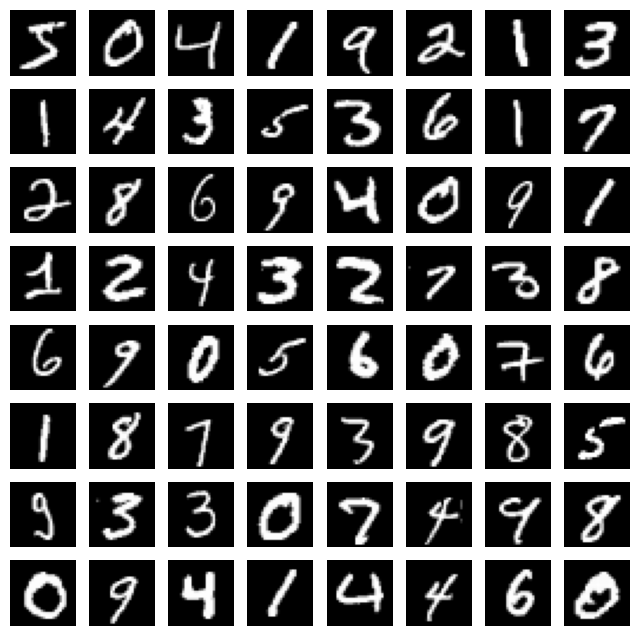

In [19]:
# Afficher les 10 premières images
plt.figure(figsize=(8, 8))  # largeur 10, hauteur 1
for i in range(64):
    plt.subplot(8, 8, i+1)  # 1 ligne, 10 colonnes
    plt.imshow(x_train[i], cmap='gray')  # image en niveaux de gris
    plt.axis('off')  # pas d'axes
    #plt.title(y_train[i])  # mettre le label au-dessus
plt.show()

In [7]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [20]:
x_train = x_train /255
x_test = x_test /255

In [30]:
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

In [32]:
from tensorflow.keras.utils import to_categorical

In [33]:
y_train_onehot = to_categorical(y_train, 10)
y_test_onehot  = to_categorical(y_test, 10)

In [35]:
y_train[0]

np.uint8(5)

In [34]:
y_train_onehot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [36]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(28*28,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flat, y_train_onehot, epochs=10)

c:\Users\Yanis victus\Desktop\M2 AMIS\Semestre 3\MYAMI215 Réseaux de neurones\ReseauxDeNeuronesM2AMIS-main\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9233 - loss: 0.2555
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9671 - loss: 0.1055
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9758 - loss: 0.0758
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9811 - loss: 0.0589
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9853 - loss: 0.0461
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9869 - loss: 0.0396
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9891 - loss: 0.0345
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9911 - loss: 0.0272
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9908 - loss: 0.0271
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9929 - loss: 0.0215


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9932 - loss: 0.0214 - val_accuracy: 0.9948 - val_loss: 0.0148
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9939 - loss: 0.0178 - val_accuracy: 0.9952 - val_loss: 0.0155
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9946 - loss: 0.0174 - val_accuracy: 0.9903 - val_loss: 0.0344
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9946 - loss: 0.0169 - val_accuracy: 0.9872 - val_loss: 0.0355
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9948 - loss: 0.0149 - val_accuracy: 0.9877 - val_loss: 0.0499
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9958 - loss: 0.0133 - val_accuracy: 0.9862 - val_loss: 0.0507
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9962 - loss: 0.0119 - val_accuracy: 0.9922 - val_loss: 0.0297
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9952 - loss: 0.0

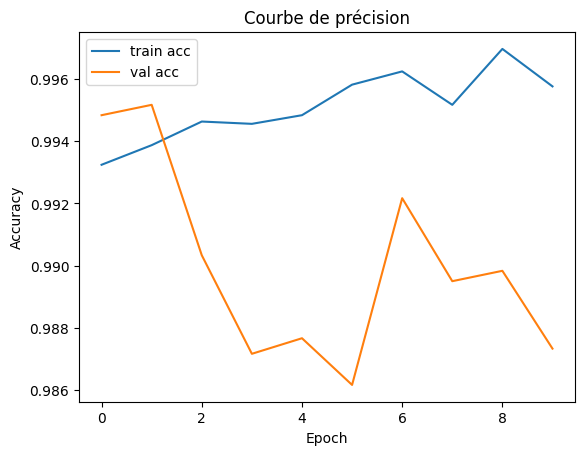

In [37]:
history = model.fit(x_train_flat, y_train_onehot, epochs=10, validation_split=0.1)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Courbe de précision')
plt.show()


In [38]:
test_loss, test_acc = model.evaluate(x_test_flat, y_test_onehot)
print("Accuracy sur test :", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9759 - loss: 0.1179
Accuracy sur test : 0.9758999943733215


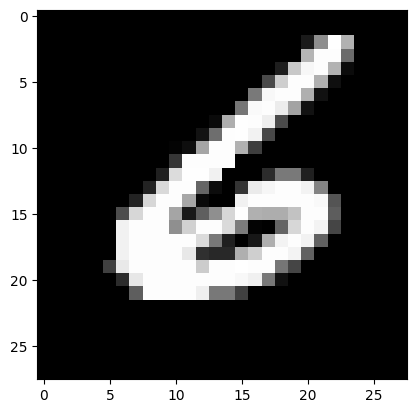

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Chiffre prédit : 6


In [45]:
import numpy as np
import matplotlib.pyplot as plt

i = np.random.randint(0, len(x_test))
plt.imshow(x_test[i], cmap='gray')
plt.show()

pred = model.predict(x_test_flat[i:i+1])
print("Chiffre prédit :", np.argmax(pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
❌ Mauvaise prédiction : le modèle a prédit 5, mais la vraie étiquette est 9


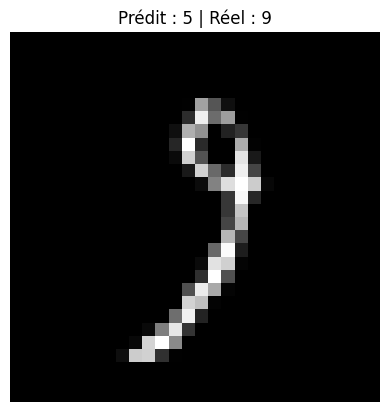

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Boucle jusqu’à trouver une erreur
while True:
    i = np.random.randint(0, len(x_test))
    
    # Prédiction du modèle
    pred = model.predict(x_test_flat[i:i+1])
    predicted_label = np.argmax(pred)
    true_label = np.argmax(y_test_onehot[i])
    
    if predicted_label != true_label:
        print(f"❌ Mauvaise prédiction : le modèle a prédit {predicted_label}, mais la vraie étiquette est {true_label}")
        plt.imshow(x_test[i], cmap='gray')
        plt.title(f"Prédit : {predicted_label} | Réel : {true_label}")
        plt.axis('off')
        plt.show()
        break


In [53]:
!pip install pillow numpy matplotlib


Prédiction : 7 | Probabilités : [2.85727001e-04 3.93031584e-03 2.51665145e-01 7.48942187e-03
 1.01108756e-03 1.11101006e-04 1.28471012e-08 6.80401921e-01
 2.34908145e-03 5.27561679e-02]


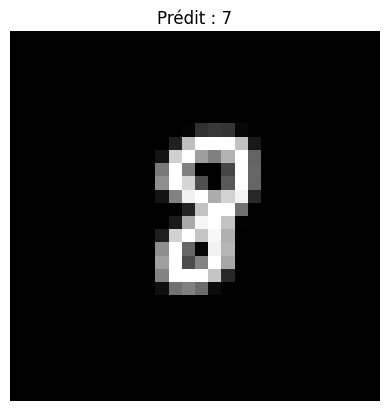

Prédiction : 7 | Probabilités : [3.1244577e-04 2.1453531e-02 2.8080660e-01 3.5534872e-04 2.3344244e-05
 5.0277859e-03 9.6864085e-07 6.3966870e-01 5.2271634e-02 7.9604099e-05]


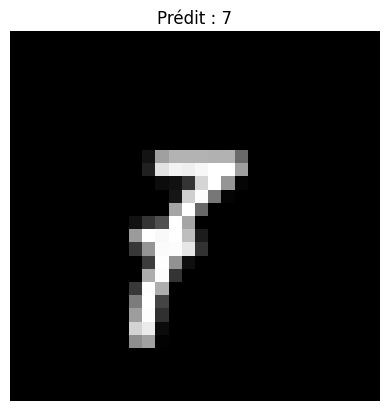

Prédiction : 4 | Probabilités : [4.9736180e-09 5.7532627e-05 4.0211663e-02 4.9450255e-06 6.8971831e-01
 1.3767625e-02 2.4527252e-10 2.2950674e-04 9.0884918e-05 2.5591955e-01]


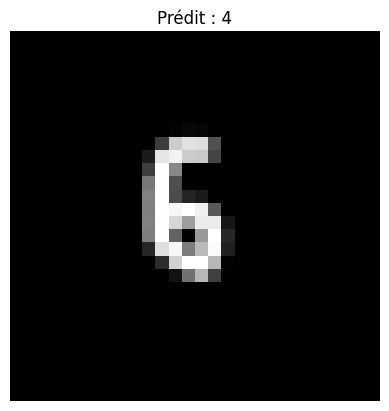

In [57]:
import tkinter as tk
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

# Taille du canvas
canvas_size = 280  # pixels
img_size = 28      # pour MNIST

# Créer une fenêtre Tkinter
root = tk.Tk()
root.title("Dessine ton chiffre")

# Créer un canvas blanc
canvas = tk.Canvas(root, width=canvas_size, height=canvas_size, bg='black')
canvas.pack()

# Image PIL pour sauvegarder le dessin
image = Image.new("L", (canvas_size, canvas_size), color=0)
draw = ImageDraw.Draw(image)

# Fonction pour dessiner avec la souris
def paint(event):
    x1, y1 = (event.x - 8), (event.y - 8)
    x2, y2 = (event.x + 8), (event.y + 8)
    canvas.create_oval(x1, y1, x2, y2, fill='white', outline='white')
    draw.ellipse([x1, y1, x2, y2], fill=255)

canvas.bind("<B1-Motion>", paint)

# Fonction pour prédire le chiffre
def predict():
    # Redimensionner à 28x28
    img_resized = image.resize((img_size, img_size))
    img_array = np.array(img_resized) / 255.0      # normalisation
    img_flat = img_array.reshape(1, 28*28)         # aplatir
    pred = model.predict(img_flat, verbose=0)
    label = np.argmax(pred)
    print(f"Prédiction : {label} | Probabilités : {pred[0]}")
    
    plt.imshow(img_array, cmap='gray')
    plt.title(f"Prédit : {label}")
    plt.axis('off')
    plt.show()

# Boutons
btn_predict = tk.Button(root, text="Predict", command=predict)
btn_predict.pack()
btn_clear = tk.Button(root, text="Clear", command=lambda: [canvas.delete("all"), draw.rectangle([0,0,canvas_size,canvas_size], fill=0)])
btn_clear.pack()

root.mainloop()


In [61]:
from sklearn.metrics import confusion_matrix
import numpy as np
# Prédictions sur tout le test
y_pred_probs = model.predict(x_test_flat, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)        # chiffre prédit
y_true = np.argmax(y_test_onehot, axis=1)  

In [62]:
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[ 971    0    0    3    0    1    2    0    2    1]
 [   0 1128    0    3    0    0    1    1    2    0]
 [   4    3  989   15    2    0    0    7   10    2]
 [   0    0    1  997    0    2    0    7    3    0]
 [   2    2    6    1  951    0    4    4    1   11]
 [   2    0    0   12    0  866    4    1    6    1]
 [   2    2    0    1    2    5  942    0    4    0]
 [   1    2   10    4    0    0    0 1001    2    8]
 [   2    1    2    9    2    6    0    2  947    3]
 [   2    2    0    6    9    3    0   14    6  967]]


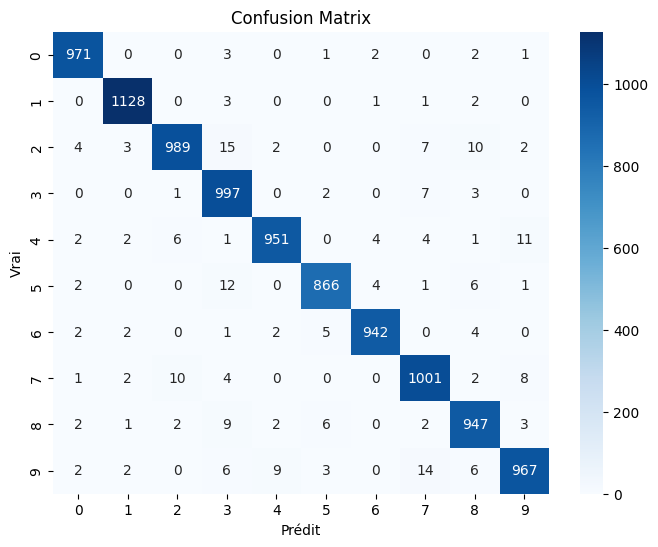

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédit")
plt.ylabel("Vrai")
plt.title("Confusion Matrix")
plt.show()


<Axes: >

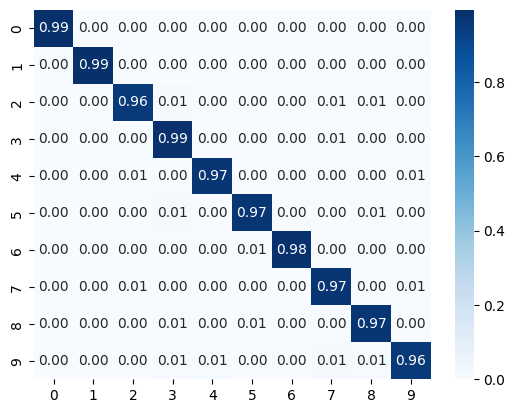

In [64]:
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues")
